In [216]:
from machine_learning.TitanicDatasetPreprocessing import get_data
from machine_learning.GaltonFamiliesPreprocessing import get_regression_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [217]:
X_train, X_test, y_train, y_test = get_regression_data()

## Linear Regression

In [218]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
pipeline = make_pipeline(MinMaxScaler(), model)
pipeline.fit(X_train, y_train)
score = pipeline.score(X_train, y_train)
y_pred = pipeline.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Score: {score}")
print(f'Error with normal regression: {error}')
print(f"Predcted coeffs: {model.coef_}")

Score: 0.7052480821096014
Error with normal regression: 3.6463129559685203
Predcted coeffs: [-9.94375325e-01 -1.94700829e+12 -1.59300678e+12  2.60309108e+12
  3.77499390e+00 -9.00959778e+00  3.61009979e+00]


In [219]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1)
pipeline_lasso = make_pipeline(StandardScaler(), model_lasso)
pipeline_lasso.fit(X_train, y_train)
y_pred = pipeline_lasso.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Error with Lasso Regression: {error}")

Error with Lasso Regression: 3.6072636122731483


In [220]:
from sklearn.linear_model import Ridge


model_ridge = Ridge(alpha=50.0)
pipeline_ridge = make_pipeline(StandardScaler(), model_ridge)
pipeline_ridge.fit(X_train, y_train)
y_pred = pipeline_ridge.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Error wirth Ridge Regression: {error}")

Error wirth Ridge Regression: 3.6075820293400236


In [221]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
param_grid = {'lasso__alpha': [0.1, 0.2, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_

params = best_lasso.get_params()
preds = best_lasso.predict(X_test)
error = mean_squared_error(y_test, preds)
cross_val_scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Error: {error}")
print(f"Mean cross-validation MSE score: {np.mean(cross_val_scores)}")
print(f"Params: alpha={params['lasso'].alpha}")

Error: 3.6072636122731483
Mean cross-validation MSE score: -3.958425534562166
Params: alpha=0.1


In [222]:
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 10.0, 100.0]}
grid_search = GridSearchCV(estimator=model_lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

params = best_model.get_params()
y_pred = best_model.predict(X_test)
error = mean_squared_error(y_test, y_pred)

print(f"Error wirth Lasso Regression after cross validation: {error}")
print(f"Params: alpha={params['alpha']}")

Error wirth Lasso Regression after cross validation: 3.615715534283915
Params: alpha=0.1


In [223]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid = {'ridge__alpha': [0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 10.0, 100.0]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

params = best_ridge.get_params()
cross_val_scores = cross_val_score(best_ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
preds = best_ridge.predict(X_test)
error = mean_squared_error(y_test, preds)

print(f"Error: {error}")
print(f"Mean cross-validation MSE score: {np.mean(cross_val_scores)}")
print(f"Params: alpha={params['ridge'].alpha}")

Error: 3.6325736479999806
Mean cross-validation MSE score: -3.7015831691716485
Params: alpha=10.0


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


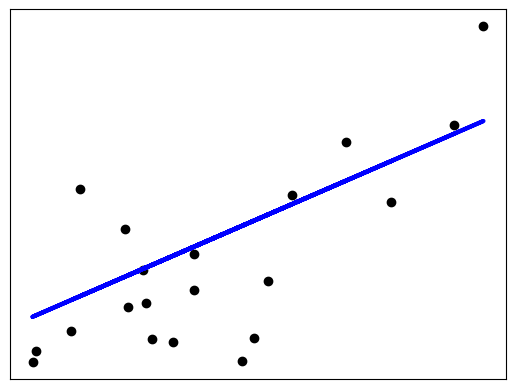

In [224]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_data()

In [226]:
model = LogisticRegression()
pipeline = make_pipeline(StandardScaler(), model)
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
accurancy = accuracy_score(y_test, preds)
print(f"Accurancy of basic form of Logistic Regression: {accurancy}")
print(f"Params: {model.get_params()}")

Accurancy of basic form of Logistic Regression: 0.8100558659217877
Params: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


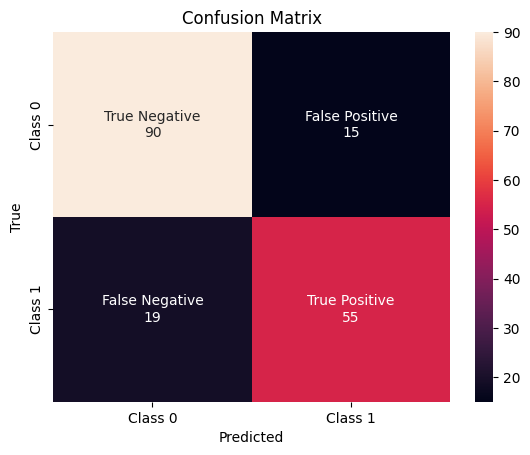

In [227]:
cm = confusion_matrix(y_test, preds)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
label_map = {
    (0, 0): labels[0],
    (0, 1): labels[1],
    (1, 0): labels[2],
    (1, 1): labels[3]
}
annot = np.array([[f'{label_map[(i, j)]}\n{cm[i, j]}' for j in range(cm.shape[1])] for i in range(cm.shape[0])])
plt.figure()
sns.heatmap(cm, annot=annot, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], fmt='')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

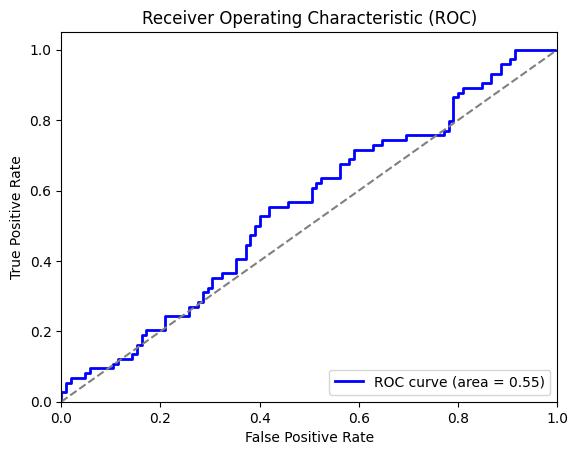

In [228]:
y_probablities = model.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_probablities)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Base line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()

In [229]:
pipeline = Pipeline([
    ('skaler', MinMaxScaler()),
    ('model', LogisticRegression())
])
param_grid = {
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__tol': [0.001, 0.0001, 0.00001, 0.000001, 0.0000001],
    'model__C': [0.1, 0.5, 0.8, 1.0, 5.0],
    'model__max_iter': [100, 300, 500, 1000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
cross_val_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring='accuracy')
f1_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring='f1')
roc_auc_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring='roc_auc')
params = best_model.named_steps['model'].get_params()

print(f"Best Logistic Regression from CV: {accuracy}")
print(f"Mean cross-validation accuracy: {np.mean(cross_val_scores)}")
print(f"Model parameters: {params}")
print(f"Mean cross-validation F1-score: {np.mean(f1_scores)}")
print(f"Mean cross-validation ROC AUC: {np.mean(roc_auc_scores)}")

Best Logistic Regression from CV: 0.7932960893854749
Mean cross-validation accuracy: 0.8156862745098039
Model parameters: {'C': 0.5, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.001, 'verbose': 0, 'warm_start': False}
Mean cross-validation F1-score: 0.753023643023643
Mean cross-validation ROC AUC: 0.8669642857142857


### Other models

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(max_depth=1, criterion='gini', splitter='best')
adaboost = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.01, algorithm="SAMME", random_state=42)
adaboost.fit(X_train, y_train)
preds = adaboost.predict(X_test)
accurancy = accuracy_score(y_test, preds)
print(f"Accurancy with sklearn adaboost: {accuracy}")

Accurancy with sklearn adaboost: 0.7932960893854749


In [266]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(X_train, y_train)
preds = gboost.predict(X_test)
accurancy = accuracy_score(y_test, preds)
print(accurancy)

0.8268156424581006


paczka
flask - jakas basic aplikacja webowa ...?
sieci neuronowe
jeszcze raz te modele
powtórka c++ i jakas aplikacja w c++

bcc51bda12980857
b5f7660bfd8124f3
5531a5c1ddcae67a
60b909d596a7587c
03ff89e6586798d1
ef1fb16ee794cc7a
e1e84a294c57bd28
9d2f6c3c82eb8c9c

PyPI recovery codes
ed73fb0a15ee0f8e
bda333f46e627277
85daacf1dc152abd
ad0f1572eef56dca
3c07dd4ae00e7d15
ee41bbb1bd50c61f
abded5bdbf489201
ee31a60d7139f9aa